In [183]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

np.set_printoptions(threshold=np.inf)

In [13]:
data = pd.read_csv('DailyReturn.csv', index_col=0)
data.head()

,SPY,AAPL,MSFT,AMZN,TSLA,GOOGL,GOOG,FB,NVDA,BRK-B,...,PNC,MDLZ,MO,ADI,GILD,LMT,SYK,GM,TFC,TJX
2021/10/21,0.002608,0.001474,0.010897,0.005842,0.032571,0.000825,0.002566,0.003228,0.026648,-0.002330,...,-0.000329,-0.002156,-0.004130,0.010683,0.001944,0.005416,0.009789,0.012832,-0.004696,0.012841
2021/10/22,-0.001036,-0.005285,-0.005149,-0.028955,0.017539,-0.030443,-0.029104,-0.050515,0.001498,0.008437,...,0.015748,0.005984,-0.000207,-0.002181,0.003732,0.003913,-0.002568,-0.010957,0.013526,-0.008040
2021/10/25,0.005363,-0.000336,-0.003332,-0.004551,0.126616,-0.000869,0.001068,0.012569,0.019361,0.003527,...,0.002221,-0.002974,-0.005599,0.011770,0.006395,0.004618,-0.009720,-0.000173,0.002017,0.017145
2021/10/26,0.000900,0.004575,0.006426,0.016775,-0.006274,0.013543,0.006478,-0.039186,0.066952,0.002033,...,-0.002263,0.008121,0.003337,-0.003545,0.000887,-0.118035,0.000476,-0.006752,-0.002013,0.001073
2021/10/27,-0.004430,-0.003148,0.042114,0.004864,0.019078,0.049595,0.048367,-0.011368,-0.010762,-0.010555,...,-0.014625,-0.007233,-0.012679,-0.052368,-0.014174,-0.002922,-0.017132,-0.054210,-0.022191,-0.011786


In [312]:
# Problem1 Create a routine for calculating an exponentially weighted covariance matrix.  If you have a 
# package that calculates it for you, verify that it calculates the values you expect.  This means 
# you still have to implement it.

# first we generate the weight

def weight_gen(n, lambd):
    weight = np.zeros(n)
    for i in range(n):
        weight[i] = (1-lambd) * (lambd) ** i
    normalized_weight = weight / np.sum(weight)
    return normalized_weight

#next we generate the covariance matrix
def cov_gen(data, weight):
    data = data - data.mean()
    weight = np.diag(weight)
    data_left = weight@data
    data_right = np.dot(data.T,data_left)
    return data_right

In [313]:
# Print the result
weight = weight_gen(data.shape[0], 0.97)
cov = cov_gen(data, weight)


In [315]:
# Use PCA and plot the cumulative variance explained by each eigenvalue for λ∈(0,1) each chosen.
# calculate th eigenvalue and eigenvector
def PCA(cov):
    eigenvalue, eigenvector = np.linalg.eig(cov)
    #descending order
    ziplist = list(zip(eigenvalue, eigenvector))
    ziplist.sort(key=lambda x: x[0], reverse=True)
    eigenvalue = [x[0] for x in ziplist]
    eigenvector = [x[1] for x in ziplist]
    #calculate the cumulative variance
    explanation = eigenvalue/np.sum(eigenvalue)
    cumulative = np.cumsum(explanation)
    cumulative[-1] = 1
    return cumulative

/Users/zhaoxiaokuan/anaconda3/lib/python3.7/site-packages/matplotlib/cbook/__init__.py:1298: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)
/Users/zhaoxiaokuan/anaconda3/lib/python3.7/site-packages/matplotlib/cbook/__init__.py:1298: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)
/Users/zhaoxiaokuan/anaconda3/lib/python3.7/site-packages/matplotlib/cbook/__init__.py:1298: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)
/Users/zhaoxiaokuan/anaconda3/lib/python3.7/site-packages/matplotlib/cbook/__init__.py:1298: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)
/Users/zhaoxiaokuan/anaconda3/lib/python3.7/site-packages/matplotlib/cbook/__init__.py:1298: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)
/Users/zha

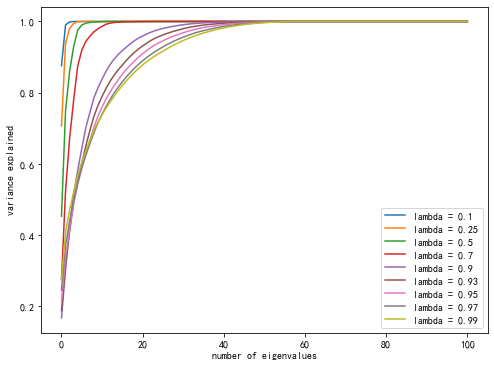

In [317]:
# plot the result
lambd = [0.1, 0.25, 0.5, 0.7, 0.9, 0.93, 0.95, 0.97, 0.99]
plt.figure(figsize=(8, 6))
for i,lambd in enumerate(lambd):
    cumulative = PCA(cov_gen(data, weight_gen(data.shape[0], lambd)))
    plt.plot(np.arange(0,data.shape[1]), cumulative, label=f"lambda = {lambd}")

plt.xlabel("number of eigenvalues")
plt.ylabel("variance explained")

plt.legend()
plt.show()


In [355]:
# Problem2 Implement Higham’s 2002 nearest psd correlation function
n = 6
Higham = np.zeros((n, n))
# make all value in Highim matrix 0.9
Higham.fill(0.9)
for i in range(n):
    Higham[i, i] = 1
Higham[0,1] = 0.7357
Higham[1,0] = 0.7357

In [357]:
# implement chol_psd()
def chol_psd(a):
    n = a.shape[1]
    #Initialize the root matrix with 0 values
    root = np.zeros((n,n))
    #loop over columns
    for j in range(n):
        s = 0
        #if we are not on the first column, calculate the dot product of the preceeding row values.
        if j>0:
            s = root[j,0:j].T@root[j,0:j]
        temp = a[j,j] - s
        # here temp is the critical value, when temp>=-1e-3, there is no nan but still invalid answer, but it is close
        if temp<=0 and temp>=-1e-3:
            temp = 0
        root[j,j] = np.sqrt(temp)
        #Check for the 0 eigan value.  Just set the column to 0 if we have one
        if root[j,j] == 0:
            for i in range(j,n):
                root[j,i] = 0
        else:
            ir = 1/root[j,j]
            for i in range(j+1,n):
                s = root[i,0:j].T@root[j,0:j]
                root[i,j] = (a[i,j] - s) * ir
    return root


In [221]:
root = chol_psd(Higham)
root

1
1
1


array([[ 1.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ],
       [ 0.7357    ,  0.67730754,  0.        ,  0.        ,  0.        ,
         0.        ],
       [ 0.9       ,  0.3511994 ,  0.25818401,  0.        ,  0.        ,
         0.        ],
       [ 0.9       ,  0.3511994 , -0.12913664,  0.22356814,  0.        ,
         0.        ],
       [ 0.9       ,  0.3511994 , -0.12913664, -0.22372278,  0.        ,
         0.        ],
       [ 0.9       ,  0.3511994 , -0.12913664, -0.22372278,  0.        ,
         0.        ]])

In [222]:
root@root.T

array([[1.        , 0.7357    , 0.9       , 0.9       , 0.9       ,
        0.9       ],
       [0.7357    , 1.        , 0.9       , 0.9       , 0.9       ,
        0.9       ],
       [0.9       , 0.9       , 1.        , 0.9       , 0.9       ,
        0.9       ],
       [0.9       , 0.9       , 0.9       , 1.        , 0.9       ,
        0.9       ],
       [0.9       , 0.9       , 0.9       , 0.9       , 1.00006917,
        1.00006917],
       [0.9       , 0.9       , 0.9       , 0.9       , 1.00006917,
        1.00006917]])

In [250]:
# implement near_psd()
def near_psd(a, epsilon = 0.0):
    is_cov = False
    for i in np.diag(a):
        if abs(i-1)>1e-8:
            is_cov = True
        else:
            is_cov = False
            break
    if is_cov:
        invSD = np.diag(1/np.sqrt(np.diag(a)))
        a = invSD@a@invSD
    vals, vecs = np.linalg.eigh(a)
    vals = np.array([max(i,epsilon) for i in vals])
    T = 1/(np.square(vecs) @ vals)
    T = np.diag(np.sqrt(T))
    l = np.diag(np.sqrt(vals))
    B  = T @ vecs @ l
    out = B @ B.T
    if is_cov:
        invSD = np.diag(1/np.diag(invSD))
        out = invSD @ out @ invSD
    return out


In [251]:
root = near_psd(Higham)
root

array([[1.        , 0.73665202, 0.89624601, 0.89624601, 0.89624601,
        0.89624601],
       [0.73665202, 1.        , 0.89624601, 0.89624601, 0.89624601,
        0.89624601],
       [0.89624601, 0.89624601, 1.        , 0.900085  , 0.900085  ,
        0.900085  ],
       [0.89624601, 0.89624601, 0.900085  , 1.        , 0.900085  ,
        0.900085  ],
       [0.89624601, 0.89624601, 0.900085  , 0.900085  , 1.        ,
        0.900085  ],
       [0.89624601, 0.89624601, 0.900085  , 0.900085  , 0.900085  ,
        1.        ]])

In [265]:
#Implement Higham’s 2002 nearest psd correlation function
def Frobenius_Norm(a):
    return np.sqrt(np.sum(np.square(a)))

def projection_u(a):
    np.fill_diagonal(a, 1.0)
    return a

# A note here, epsilon is the smallest eigenvalue, 0 does not work well here, will still generate very small negativa values, so I set it to 1e-7
def projection_s(a, epsilon = 1e-7):
    vals, vecs = np.linalg.eigh(a)
    vals = np.array([max(i,epsilon) for i in vals])
    return vecs@np.diag(vals)@vecs.T

def Higham_method(a, tol = 1e-8):
    s = 0
    gamma = np.inf
    y = a
    # iteration
    while True:
        r = y - s
        x = projection_s(r) 
        s = x - r
        y = projection_u(x)
        gamma_next = Frobenius_Norm(y-a)
        if abs(gamma - gamma_next) < tol:
            break
        gamma = gamma_next
    return y


In [253]:
n = 500
Higham_500 = np.zeros((n, n))
# make all value in Highim matrix 0.9
Higham_500.fill(0.9)
for i in range(n):
    Higham_500[i, i] = 1
Higham_500[0,1] = 0.7357
Higham_500[1,0] = 0.7357

In [254]:
def is_psd(matrix):
    eigenvalues = np.linalg.eigvals(matrix)
    return np.all(eigenvalues >= 0)

In [268]:
print(is_psd(near_psd(Higham_500)))
print(is_psd(Higham_method(Higham_500)))

True
True


In [270]:
# Comparing the Frobenius norm of the difference between the original matrix and the output of the two functions
print(Frobenius_Norm(near_psd(Higham_500)-Higham_500))
print(Frobenius_Norm(Higham_method(Higham_500)-Higham_500))

0.6275226557679096
0.08964812832882717


In [272]:
def Higham_with_n(n):
    Higham = np.zeros((n, n))
    # make all value in Highim matrix 0.9
    Higham.fill(0.9)
    for i in range(n):
        Higham[i, i] = 1
    Higham[0,1] = 0.7357
    Higham[1,0] = 0.7357
    return Higham

In [277]:
import timeit
n = [100, 300, 500, 700,1000]
Higham_method_time = []
Near_psd_time = []
for i in n:
    Higham = Higham_with_n(i)
    Higham_method_time.append(timeit.timeit(lambda: Higham_method(Higham), number=1))
    Near_psd_time.append(timeit.timeit(lambda: near_psd(Higham), number=1))

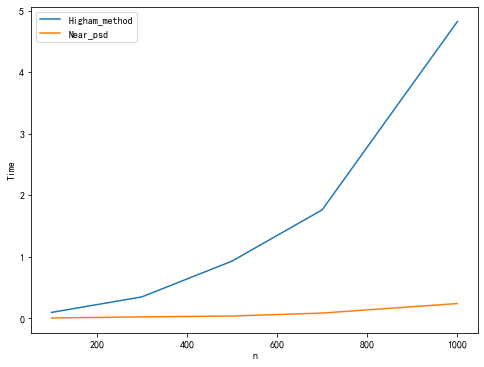

In [279]:
plt.figure(figsize=(8,6))
plt.plot(n, Higham_method_time, label = "Higham_method")
plt.plot(n, Near_psd_time, label = "Near_psd")
plt.legend()
plt.xlabel("n")
plt.ylabel("Time")
plt.show()

In [280]:
Higham_method_frob = []
Near_psd_frob = []
for i in n:
    Higham = Higham_with_n(i)
    Higham_method_frob.append(Frobenius_Norm(Higham_method(Higham) - Higham))
    Near_psd_frob.append(Frobenius_Norm(near_psd(Higham) - Higham))

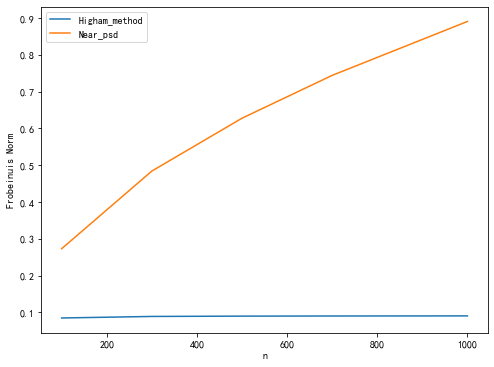

In [281]:
plt.figure(figsize=(8,6))
plt.plot(n, Higham_method_frob, label = "Higham_method")
plt.plot(n, Near_psd_frob, label = "Near_psd")
plt.legend()
plt.xlabel("n")
plt.ylabel("Frobeinuis Norm")
plt.show()

In [284]:
# Problem 3
# Implement a multivariate normal simulation that allows for simulation directly from a covariance matrix
# running simulations, equally corr; expoentially cov; vice versa

def multivariate_normal_distribution(cov, num_of_simulation=25000):
    return chol_psd(cov) @ np.random.normal(size=(cov.shape[0], num_of_simulation))

In [321]:
# Generate the four combination of covariance matrixs
# variance matrix
def var(cov):
    return np.diag(cov)
# Correlation matrix
def corr(cov):
    return np.diag(1/np.sqrt(var(cov))) @ cov @ np.diag(1/np.sqrt(var(cov))).T
# Covariance matrix
def cov(var, cor):
    std = np.sqrt(var)
    return np.diag(std) @ cor @ np.diag(std).T

In [322]:
ew_cov = cov_gen(data, weight_gen(data.shape[0], 0.97))
normal_cov = np.cov(data.T)
norm_corr_normal_var = cov(var(normal_cov), corr(normal_cov))
ew_corr_normal_var = cov(var(normal_cov), corr(ew_cov))
normal_corr_ew_var = cov(var(ew_cov), corr(normal_cov))
ew_corr_ew_var = cov(var(ew_cov), corr(ew_cov))


In [391]:
# using PCA with an optional parameter for % variance explained.
def PCA_with_percent(cov, percent = 0.95, num_of_simulation = 25000):
    eigenvalue, eigenvector = np.linalg.eigh(cov)
    total = np.sum(eigenvalue)
    for i in range(cov.shape[0]):
        i = len(eigenvalue)-i-1
        if eigenvalue[i]<0:
            eigenvalue = eigenvalue[i+1:]
            eigenvector = eigenvector[:,i+1:]
            break
        if sum(eigenvalue[i:])/total > percent:
            eigenvalue = eigenvalue[i:]
            eigenvector = eigenvector[:,i:]
            break
    simulate = np.random.normal(size = (len(eigenvalue),num_of_simulation))
    return eigenvector @ np.diag(np.sqrt(eigenvalue)) @ simulate


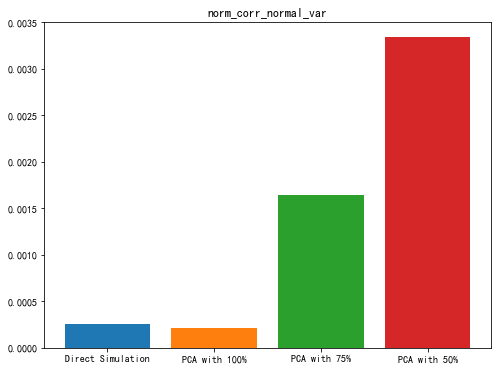

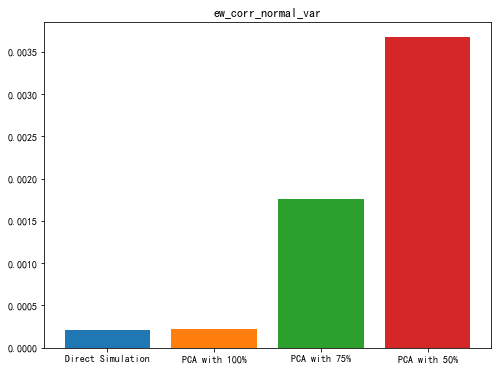

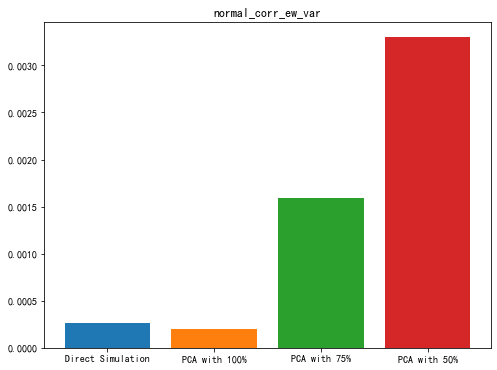

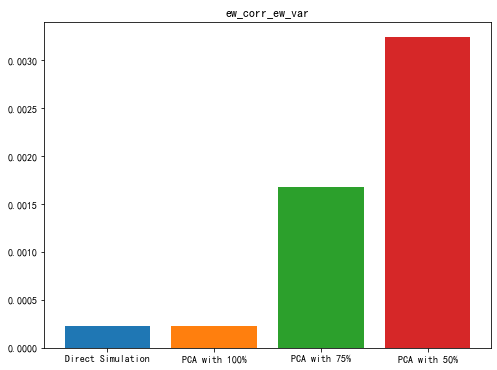

In [392]:
covs = [norm_corr_normal_var, ew_corr_normal_var, normal_corr_ew_var, ew_corr_ew_var]
title = ["norm_corr_normal_var", "ew_corr_normal_var", "normal_corr_ew_var", "ew_corr_ew_var"]
for i in range(len(covs)):
    plt.figure(i,figsize=(8,6))
    plt.title(title[i])
    cov = covs[i]
    data1 = multivariate_normal_distribution(cov,25000)
    data2 = PCA_with_percent(cov, 1, 25000)
    data3 = PCA_with_percent(cov, 0.75, 25000)
    data4 = PCA_with_percent(cov, 0.5, 25000)
    plt.bar("Direct Simulation",Frobenius_Norm(cov-np.cov(data1)))
    plt.bar("PCA with 100%",Frobenius_Norm(cov-np.cov(data2)))
    plt.bar("PCA with 75%",Frobenius_Norm(cov-np.cov(data3)))
    plt.bar("PCA with 50%",Frobenius_Norm(cov-np.cov(data4)))
    plt.show()


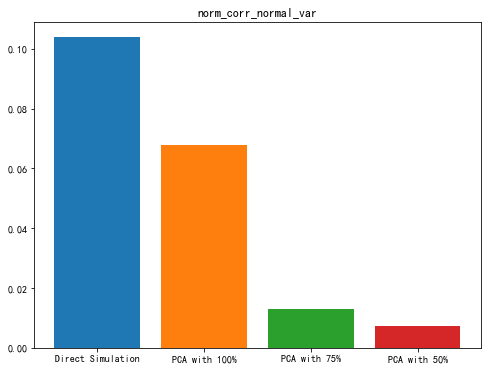

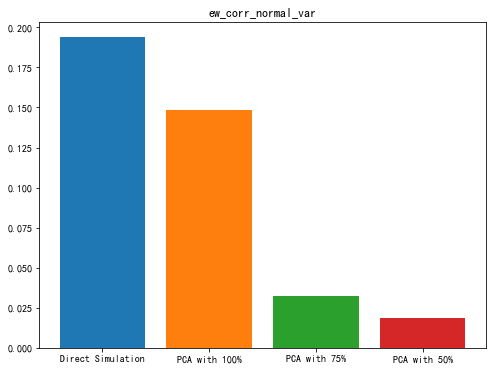

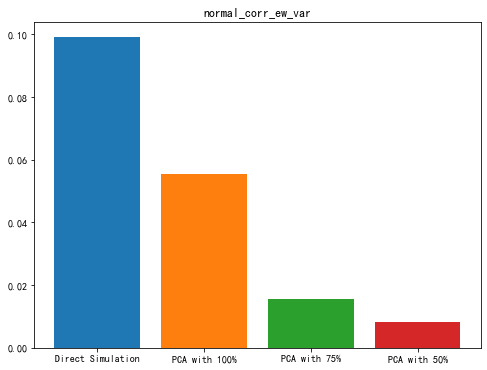

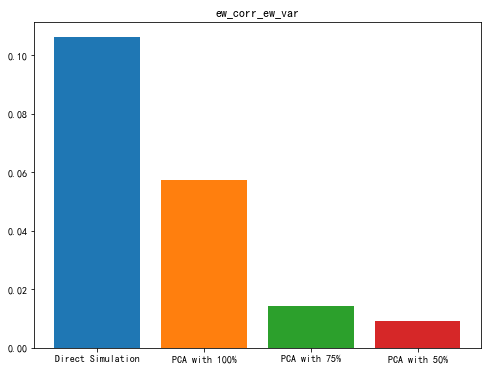

In [399]:
# Compare runtime
import time
covs = [norm_corr_normal_var, ew_corr_normal_var, normal_corr_ew_var, ew_corr_ew_var]
title = ["norm_corr_normal_var", "ew_corr_normal_var", "normal_corr_ew_var", "ew_corr_ew_var"]
for i in range(len(covs)):
    plt.figure(i,figsize=(8,6))
    plt.title(title[i])
    cov = covs[i]
    start = time.time()
    time_data1 = multivariate_normal_distribution(cov,25000)
    end1 = time.time() - start
    start = time.time()
    time_data2 = PCA_with_percent(cov, 1, 25000)
    end2 = time.time() - start
    start = time.time()
    time_data3 = PCA_with_percent(cov, 0.75, 25000)
    end3 = time.time() - start
    start = time.time()    
    time_data4 = PCA_with_percent(cov, 0.5, 25000)
    end4 = time.time() - start
    plt.bar("Direct Simulation",end1)
    plt.bar("PCA with 100%",end2)
    plt.bar("PCA with 75%",end3)
    plt.bar("PCA with 50%",end4)
    plt.show()